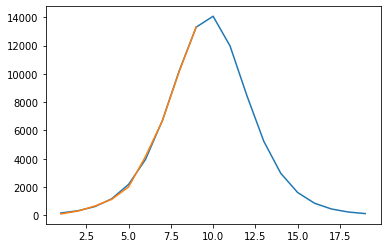

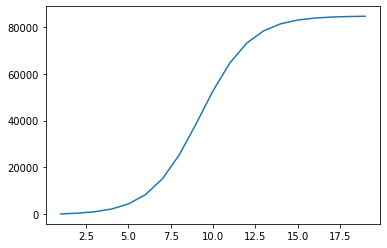

In [ ]:
#The Bass Diffusion model below forecast long-term data for innovative/new 
#products that do not have a lot of previous data. This model is typically 
#used to visualize the success of a product based on a few data points.The 
#output of this code shows a non-cumulative, which looks at sales at a specific
#point in time, and cumulative graph, whcih looks at total sales from one point
#to another.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header = None)

#load data

obs_sales=load_data("TruckEl(1).csv")
#The next line changes the dataframe to a NumpyArray
obs_sales=obs_sales.values.flatten()

#we need t in order to find n(t), below we are defining t
t_vec=np.arange(1,10)

#define function  for n(t) that gives bass model forecast n(t) given 
#bass_params = [N, p, q]-vector
#here we are creating a function to get an output of n(t)
def nt(bass_params,t_vec):
  N= bass_params[0]
  p= bass_params[1]
  q = bass_params[2]

  nt_vec=N*p*(p+q)**2*np.exp(-(p+q)*t_vec)/(p+q*np.exp(-(p+q)*t_vec))**2
  return nt_vec

#Here we are making a guess for our bass parameters
#Example 1
#nt([50,0.1,0.1], t_vec)
#Ans:array([4.95033145, 4.80521491, 4.57568481, 4.27819393, 3.93223866,
#3.55788881, 3.17369795, 2.79527584, 2.43458681, 2.09987171])

#Example 2
#nt([50,0.1,0.1],5)
#Ans:3.9322386648296384

#develop optimization framework to predict Bass model parameters
# initialize (starting guess) vector of bass_params [N, p, q]
#If you were asked to find only two outputs for the bass_guess then 
#you would edit the line below

bass_guess=[6000,0.01,0.02]
#define function that given values of bass_params, gives the predicition error of 
#n(t) vs the ground observed truth (loaded data)
#The goal is to minimize errors between the bass diffusion predictions and the 
#actual values

def error(bass_params,t_vec,obs_sales):
  return nt(bass_params,t_vec)-obs_sales
                  
#use optimization library to optimize (minimize error) of the bass_params value to 
#predict n(t)
#By adding error we are putting the function into the library
opt_params, success =leastsq(error,bass_guess,args=(t_vec,obs_sales))

#Looking at the error of the dat you've computed
#error(opt_params,t_vec,obs_sales)
#Ans: array([ 67.11581649,   9.53988457,   8.18954958, -13.78379161,
#-24.17213995, -18.48985666,  -0.36367495,  18.65859478,
#6.67226934,  -7.97479334])

#retireve optimal bass parameters

N_opt=opt_params[0]
p_opt=opt_params[0]
q_opt=opt_params[2]

nt_forecast=nt(opt_params, np.arange(1,20))

#plot the optimized bass model for n(t)

plt.figure()
plt.plot(np.arange(1,20),nt_forecast)
plt.plot(t_vec,obs_sales)

#plot the optimized bass model for N(t)
Nt_forecast=np.cumsum(nt_forecast)

plt.figure()
plt.plot(np.arange(1,20),Nt_forecast)